In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [56]:
#load data
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)
max([max(sequence) for sequence in train_data])
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [57]:
#prepare data
import numpy as np

def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i][sequence] = 1.0
    return results

# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)
# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

In [58]:
#Building your model
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [59]:
#validating approach

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#train with 20 epoches
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 0.5868 - accuracy: 0.7444 - val_loss: 0.4458 - val_accuracy: 0.8541
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3439 - accuracy: 0.8935 - val_loss: 0.3188 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.9236 - val_loss: 0.2870 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1783 - accuracy: 0.9436 - val_loss: 0.2771 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.9580 - val_loss: 0.2820 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1108 - accuracy: 0.9700 - val_loss: 0.2963 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0892 - accuracy: 0.9763 - val_loss: 0.3139 - val_accuracy: 0.8826
Epoch 8/20
30/30 [=

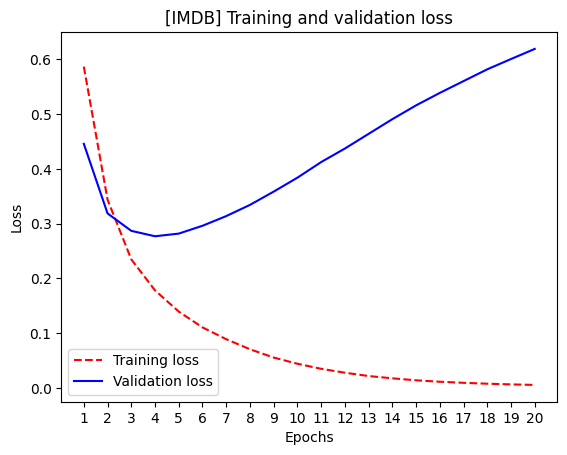

In [60]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# "r--" is for "dashed red line."
plt.plot(epochs, loss_values, "r--", label="Training loss")
# "b" is for "solid blue line."
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

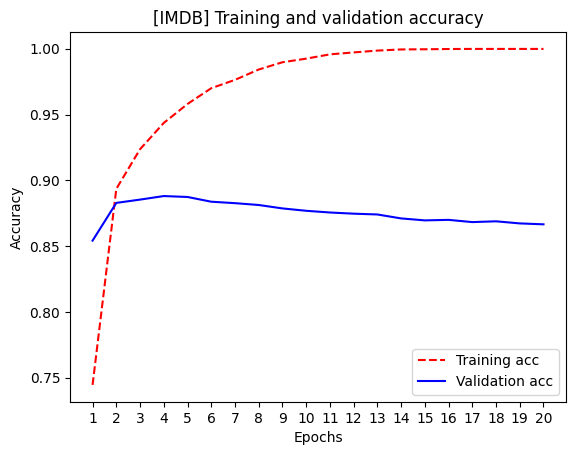

In [61]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [62]:
#train model from scratch
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 4ms/step - loss: 0.5536 - accuracy: 0.7848
Epoch 2/4
49/49 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8983
Epoch 3/4
49/49 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9254
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2913 - accuracy: 0.8856


In [63]:
model.predict(x_test)

782/782 [==============================] - 1s 677us/step


array([[0.17053838],
       [0.9992908 ],
       [0.83161724],
       ...,
       [0.07899974],
       [0.07752073],
       [0.63858056]], dtype=float32)